<a href="https://colab.research.google.com/github/nfomenky/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-11-14 02:33:22--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.178.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.178.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  45.3MB/s    in 4.8s    

2019-11-14 02:33:27 (41.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
orders = pd.read_csv('orders.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

In [29]:
order_products__prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [28]:
orders.sample(7)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3078125,2237407,185633,prior,28,0,10,5.0
2335597,1934155,140613,prior,25,3,18,30.0
968414,403585,58147,prior,5,3,21,9.0
3376989,2200727,203492,prior,3,0,14,5.0
1286042,2331006,77321,prior,3,1,14,3.0
3372106,2492257,203222,prior,9,2,16,6.0
2447679,1050278,147291,prior,38,6,18,6.0


In [30]:
products.sample(7)

,product_id,product_name,aisle_id,department_id
45578,45579,Sliced White Potatoes,81,15
3055,3056,"Ravioli, Five Cheese, Value Pack",12,9
11165,11166,Volcano Shrimp Cheese & Jalapeno Stuffed,34,1
28643,28644,Automatic Freshener Refill Clean Linen,101,17
31566,31567,Organic Pearl Heirloom Quinoa,63,9
44541,44542,Taster's Choice Instant Coffee Decafe House Blend,26,7
6096,6097,Plant Based Mango Cashew Lucuma Paleo Print Co...,61,19


In [33]:
# i need the order id and product id from order_products__prior and product id 
# and product name from products table

ordered = order_products__prior[['order_id', 'product_id']]
ordered.sample(7)

,order_id,product_id
679479,71877,6361
15473114,1632705,44167
19995813,2108963,18890
30638265,3231619,31727
1954498,206131,42828
30797521,3248629,424
25541148,2693711,46041


In [0]:
cols = [
        'Banana',
        'Bag of Organic Bananas',
        'Organic Strawberries',
        'Organic Baby Spinach',
        'Organic Hass Avocado',
        'Organic Avocado',
        'Large Lemon',
        'Strawberries',
        'Limes',
        'Organic Whole Milk'
       ]

In [0]:
condition = products['product_name'].isin(cols)

In [68]:
top_products = products[condition]
top_products = top_products.drop(axis=1, columns=['aisle_id', 'department_id'])
top_products

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [80]:
# merge columns 
merged = pd.merge(ordered, top_products, on='product_id')
merged.head()

,order_id,product_id,product_name
0,3,21903,Organic Baby Spinach
1,26,21903,Organic Baby Spinach
2,31,21903,Organic Baby Spinach
3,39,21903,Organic Baby Spinach
4,56,21903,Organic Baby Spinach


In [95]:
# get the counts of the top 10 most orderd products
merged['product_name'].value_counts()

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
# Tidy and pivot for table2 was done in the notes

In [0]:
flights = sns.load_dataset('flights')

In [0]:
##### YOUR CODE HERE #####

In [19]:
flights.sample(10)

,year,month,passengers
136,1960,May,472
95,1956,December,306
102,1957,July,465
88,1956,May,318
34,1951,November,146
87,1956,April,313
7,1949,August,148
64,1954,May,234
61,1954,February,188
66,1954,July,302


In [20]:
print(list(flights.columns))
print(list(flights.index))

['year', 'month', 'passengers']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]


In [0]:
flights = flights.reset_index()

In [21]:
flights.sample(8)

,year,month,passengers
28,1951,May,172
46,1952,November,172
134,1960,March,419
126,1959,July,548
66,1954,July,302
32,1951,September,184
22,1950,November,114
119,1958,December,337


In [0]:
tidy = flights.melt(id_vars=['year', 'month'], value_vars=['passengers'])

In [27]:
tidy.sample(8)

,year,month,variable,value
43,1952,August,passengers,242
4,1949,May,passengers,121
29,1951,June,passengers,178
78,1955,July,passengers,364
59,1953,December,passengers,201
88,1956,May,passengers,318
74,1955,March,passengers,267
122,1959,March,passengers,406


In [30]:
tidy[tidy['year'] == 1949]

,year,month,variable,value
0,1949,January,passengers,112
1,1949,February,passengers,118
2,1949,March,passengers,132
3,1949,April,passengers,129
4,1949,May,passengers,121
5,1949,June,passengers,135
6,1949,July,passengers,148
7,1949,August,passengers,148
8,1949,September,passengers,136
9,1949,October,passengers,119


In [31]:
tidy[tidy['year'] == 1960]

,year,month,variable,value
132,1960,January,passengers,417
133,1960,February,passengers,391
134,1960,March,passengers,419
135,1960,April,passengers,461
136,1960,May,passengers,472
137,1960,June,passengers,535
138,1960,July,passengers,622
139,1960,August,passengers,606
140,1960,September,passengers,508
141,1960,October,passengers,461


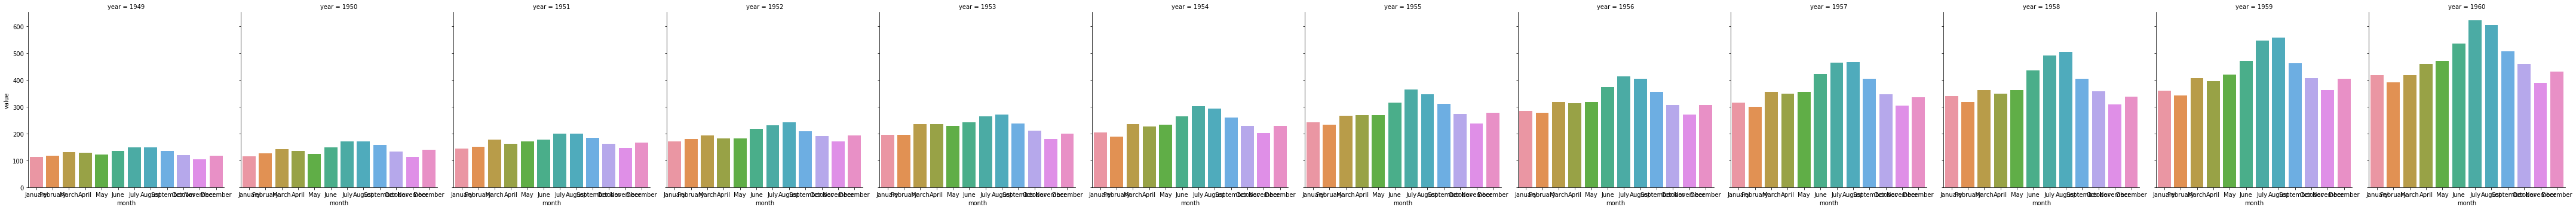

In [33]:
sns.catplot(data=tidy, x='month', y='value', col='year', kind='bar');

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####